In [1]:
# %matplotlib widget
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from pyedflib import highlevel
from sklearn.decomposition import PCA, FastICA
import numpy as np
import os
import mne
from tqdm.auto import tqdm
from srcs.preprocessing import retrieve_data, parse_filter_data
PATH='/mnt/nfs/homes/thoberth/sgoinfre/physionet.org/files/eegmmidb/1.0.0/'

In [2]:
data = retrieve_data(PATH)

  0%|          | 0/15 [00:00<?, ?it/s]

# Separate both type of labels and standardize value

In [3]:
dataT1, dataT2 = parse_filter_data(data)
del data
dataT1.shape, dataT2.shape

((1077, 64, 1), (1083, 64, 1))

# Show explained variance for each number of component

(1077, 64)


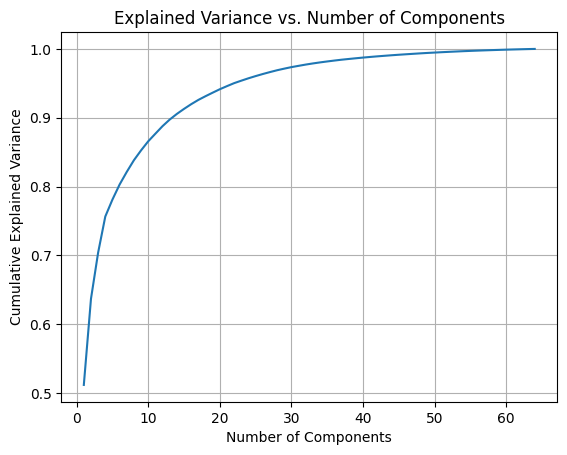

In [6]:
dataT1 = dataT1.reshape(dataT1.shape[0], dataT1.shape[1])
print(dataT1.shape)
pca = PCA().fit(dataT1)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

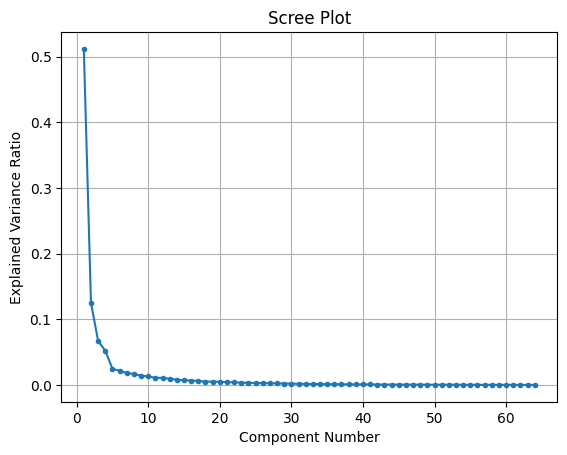

In [7]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-', markersize=3)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

plt.show()

# Define the n components after analysis

In [15]:
pca.n_components = 15
pca.fit_transform(dataT1).shape

(1077, 15)

In [12]:
PCA(n_components=15).fit_transform(dataT1).shape

(1077, 15)